# Opentrons Mass Balance Automation 

## Aniket Chitre

### 0. Import Packages

In [1]:
%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import time
import serial
import csv

### 1. Port for Mass Balance

Find the port number on Windows through Device Manager or on Mac through running this command (`ls /dev/tty.*`) on the Terminal

In [2]:
#port = '/dev/tty.usbserial-14130'
port = 'COM5'

### 2. Function to Read Mass from Balance

In [3]:
def get_mass(port):
    try:
        balance = serial.Serial(port, 9600, xonxoff=True) # check COM port and xonxoff (handshake) = True default for MT balance
        balance.write('S\r\n'.encode('utf-8'))
        time.sleep(1)
        result  = balance.read_until('\r\n'.encode('utf-8'))
        value = str(result[7:14].decode("utf-8"))
        #balance.close()
        if (value.strip() != '-------') and (value.strip() != ''):
            return (True,float(value))
        return (False,-1)
    except:
        return (False,-1)

### 3. Real-time Data

In [4]:
x = [] #store time here 
mass = [] #store mass here
i = 0

while True:
    x.append(i*2)
    
    status, val = get_mass(port)
    if status == True:
        curr_val = val
    else:
        curr_val = mass[-1]
        
    print(curr_val)
    mass.append(curr_val)
    
    time.sleep(1)
    i += 1

0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
-0.001
-0.002
-0.002
-0.002
-0.002
0.0
-0.003
-0.003
0.986
0.986
0.985
0.986
1.967
1.967
1.967
1.966
2.962
2.961
2.96
2.959
3.955
3.954
3.953
3.953
4.946
4.949
4.951
4.948
4.949
5.951
5.95
5.949
6.5
6.503
6.505
6.504
7.051
7.051
7.05
7.05
8.049
8.049
8.049
8.047
9.03
9.033
9.035
9.034
9.034
10.027
10.03
10.033
10.032
10.031
11.007
11.009
11.012
11.011
11.011
12.018
12.018
12.016
12.016
13.002
13.005
13.008
13.008
13.008
13.635
13.639
13.641
13.639
13.64
14.289
14.292
14.293
14.292
14.292
15.288
15.288
15.288
15.288
16.286
16.286
16.285
16.284
17.283
17.283
17.281
17.282
18.282
18.282
18.28
18.279
19.265
19.265
19.264
19.264
20.263
20.262
20.262
20.895
20.895
20.895
20.895
21.528
21.528
21.527
21.527
22.507
22.507
22.506
22.506
23.498
23.498
23.497
23.497
23.497
24.494
24.492
24.492
25.487
25.486
25.485
25.485
26.468
26.468
26.466
26.466
27.452
2

57.946
57.946
57.946
57.946
57.946
57.946
57.946
57.945
57.945
57.945
57.945
57.944
57.944
57.944
57.944
57.944
57.944
57.944
57.944
57.944
57.944
57.943
57.94
57.944
57.942
58.04
58.072
58.071
58.071
58.07
58.07
58.07
58.069
58.069
58.069
58.069
58.072
58.072
58.072
58.071
58.071
58.071
58.071
58.072
58.072
58.072
58.072
58.071
58.071
58.07
58.07
58.07
58.068
58.069
58.069
58.069
58.068
58.068
58.068
58.068
58.068
58.068
58.068
58.068
58.067
58.067
58.067
58.067
58.067
58.067
58.067
58.067
58.067
58.067
58.066
58.065
58.064
58.066
58.065
58.091
58.117
58.198
58.225
58.225
58.225
58.225
58.225
58.244
58.244
58.245
58.245
58.243
58.243
58.243
58.244
58.243
58.242
58.242
58.241
58.245
58.244
58.243
58.243
58.242
58.242
58.242
58.242
58.242
58.242
58.242
58.242
58.241
58.241
58.24
58.24
58.239
58.239
58.239
58.239
58.239
58.239
58.239
58.239
58.239
58.239
58.239
58.239
58.237
58.237
58.237
58.237
58.264
58.291
58.319
58.347
58.347
58.347
58.347
58.347
58.347
58.347
58.366
58.366
58.366
58

KeyboardInterrupt: 

In [5]:
results = {'Time': x, 'Mass': mass}

### 4. Plotting and Exporting Data

In [6]:
mass_df = pd.DataFrame(results)
mass_df

,Time,Mass
0,0,0.000
1,2,0.000
2,4,0.000
3,6,0.000
4,8,0.000
...,...,...
1595,3190,59.589
1596,3192,59.590
1597,3194,59.590
1598,3196,59.590


<IPython.core.display.Javascript object>


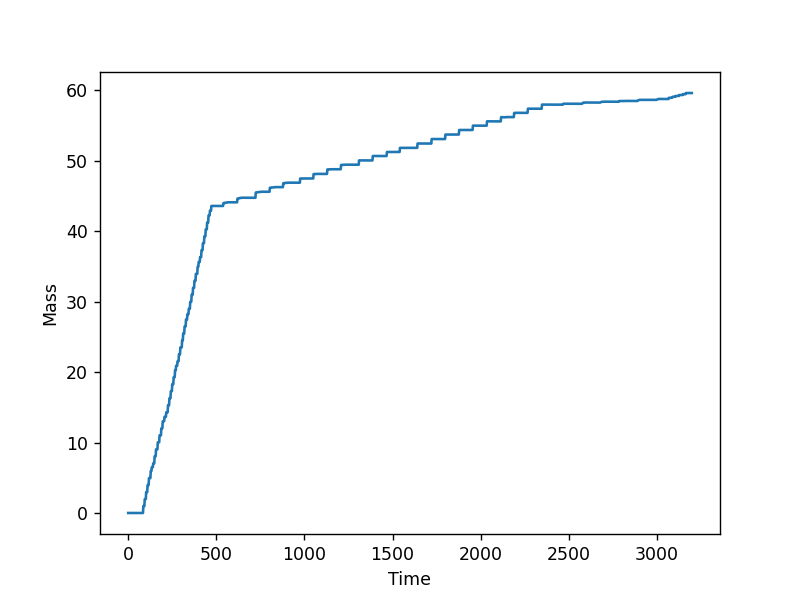

In [7]:
sns.lineplot(x='Time', y='Mass', data=mass_df);

In [8]:
mass_df.to_csv('mass_data/MassProfile_100423_S283-288.csv')